# 시계열 회귀분석_공기압축기

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import statsmodels.api as sm

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
os.chdir(r"C:\Users\user\Desktop\산공 빅데이터 경진대회")

In [4]:
raw_data = pd.read_csv("comp1_concat.csv")

In [5]:
comp_1_one = raw_data.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
comp_1_one['NEWTIME'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('NEWTIME', inplace=True)

# train test 분할

In [308]:
X = comp_1_one
X_train = comp_1_one[:43135]
X_test = comp_1_one[43135:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]

<AxesSubplot:>

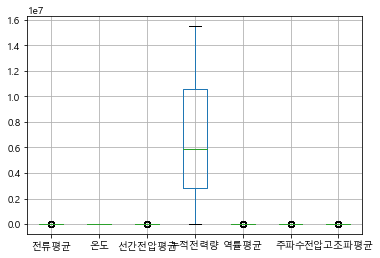

In [8]:
X_train.boxplot()

# 표준화

In [309]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.RobustScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [310]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [311]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [312]:
X_train_scaling

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-10-22 00:00:22,0.070440,0.555556,0.063289,-0.726490,-0.000322,0.249578,1.289474
2020-10-22 00:01:22,-1.071670,0.555556,0.088604,-0.726418,-1.891916,-0.000321,1.289474
2020-10-22 00:02:22,0.083051,0.555556,0.037975,-0.726335,-0.002930,1.250087,1.263158
2020-10-22 00:03:22,0.139649,0.444444,0.101264,-0.726235,-0.006038,0.249578,1.289474
2020-10-22 00:04:22,-0.620424,0.666667,0.126579,-0.726148,-0.398321,0.750074,1.289474
...,...,...,...,...,...,...,...
2020-11-22 23:55:35,-2.011381,-1.444444,1.012655,1.239119,-33.884413,0.499451,-0.026316
2020-11-22 23:56:35,-2.011381,-1.444444,0.999995,1.239119,-33.884413,-1.747049,-0.026316
2020-11-22 23:57:35,-2.011381,-1.333333,0.987340,1.239119,-33.884413,-0.250114,-0.078947


In [313]:
X_test_scaling

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-11-23 00:00:35,-2.011381,-1.222222,1.037970,1.239119,-33.884413,-0.000321,-0.026316
2020-11-23 00:01:35,-2.011381,-1.333333,1.126579,1.239119,-33.884413,-1.248428,0.026316
2020-11-23 00:02:35,-2.011381,-1.444444,1.037970,1.239119,-33.884413,0.499665,-0.026316
2020-11-23 00:03:35,-2.011381,-1.333333,1.278477,1.239119,-33.884413,-0.998822,0.000000
2020-11-23 00:04:35,-2.011381,-1.222222,1.164553,1.239119,-33.884413,-0.749404,-0.052631
...,...,...,...,...,...,...,...
2020-11-26 23:55:35,0.030760,-0.777778,0.582274,1.669427,0.009790,0.249578,-0.289474
2020-11-26 23:56:35,-0.902184,-0.888889,0.734173,1.669506,-1.071478,0.749592,-0.263157
2020-11-26 23:57:35,-0.784682,-0.777778,0.860756,1.669586,-0.727468,-1.497872,-0.263157


# VIF 확인

처음에 다 넣고 유효전력, 무효전력, 상전압 제거한 과정 보여주기

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# correlation from features
X_train_scaling.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
전류평균,1.00,0.44,-0.55,-0.19,0.90,0.22,0.14
온도,0.44,1.00,-0.46,-0.09,0.50,0.46,0.04
선간전압평균,-0.55,-0.46,1.00,0.22,-0.55,-0.20,0.23
누적전력량,-0.19,-0.09,0.22,1.00,-0.19,-0.03,0.01
역률평균,0.90,0.50,-0.55,-0.19,1.00,0.24,0.18
주파수,0.22,0.46,-0.20,-0.03,0.24,1.00,-0.02
전압고조파평균,0.14,0.04,0.23,0.01,0.18,-0.02,1.00


In [16]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 
# 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(X_train_scaling.values, i) 
                     for i in range(X_train_scaling.shape[1])]
vif['Feature'] = X_train_scaling.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
3,1.060436,누적전력량
6,1.230494,전압고조파평균
5,1.278306,주파수
1,1.718639,온도
2,1.902364,선간전압평균
0,5.381170,전류평균
4,5.866696,역률평균


# 정상성 확인 시각화

In [17]:
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

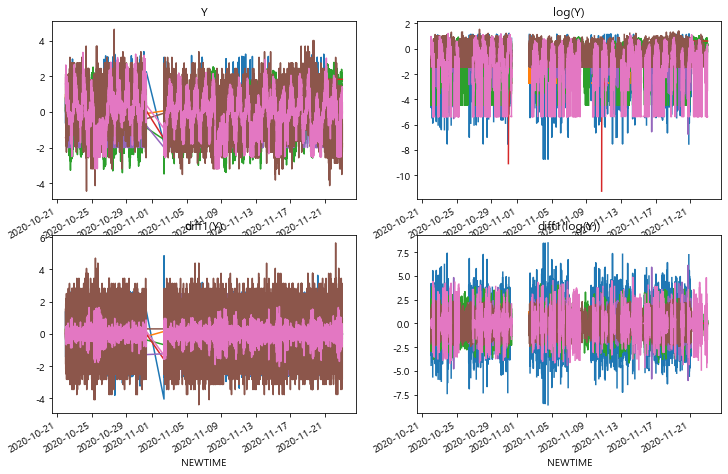

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
#from module import stationarity_adf_test, stationarity_kpss_test

raw = X_train_scaling

## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False) ## 그냥 원데이터
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False) ## 원데이터에 로그 취함
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False) ## 원데이터에 차분 
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False) ## 원데이터에 로그취한 걸 차분
plt.show()

In [20]:
raw0=raw.iloc[:,0]
raw1=raw.iloc[:,1]
raw2=raw.iloc[:,1]
raw3=raw.iloc[:,3]
raw_list = [raw0,raw1,raw2,raw3]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


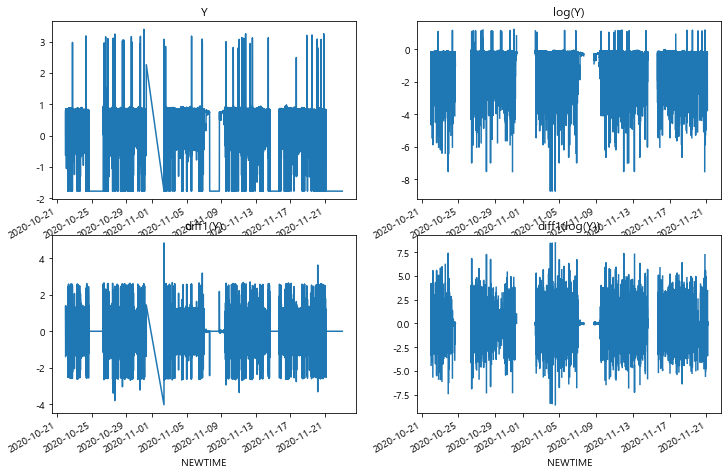

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


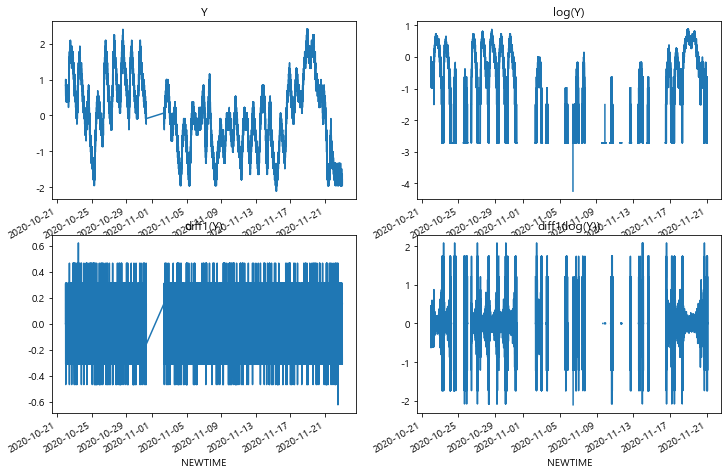

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


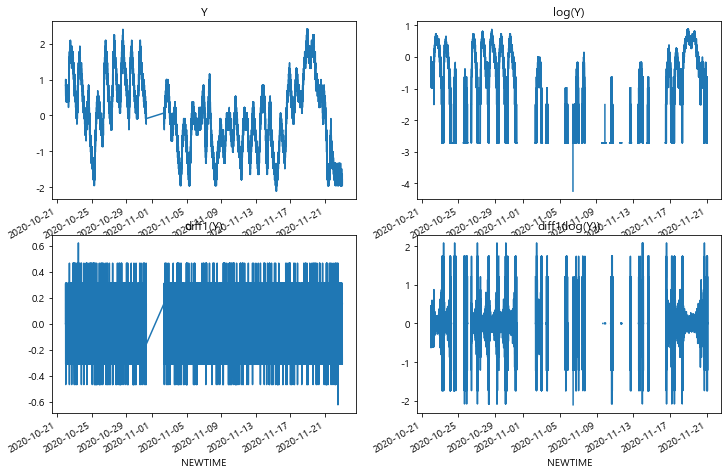

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


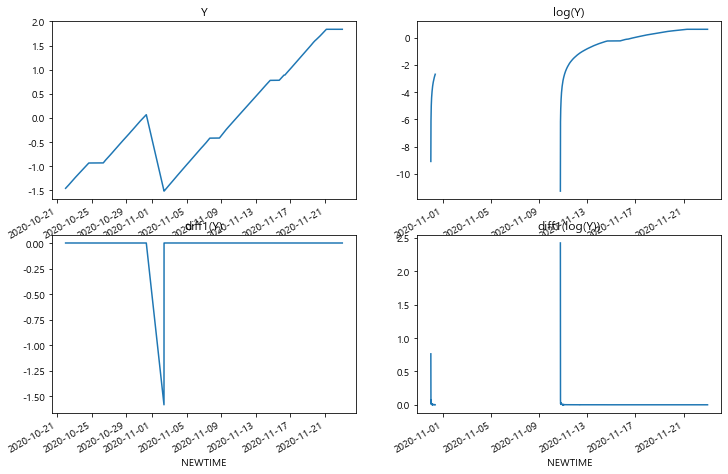

In [21]:
for raw in raw_list:
    plt.figure(figsize=(12,8))
    raw.plot(ax=plt.subplot(221), title='Y', legend=False)
    np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
    raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
    np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
    plt.show()

# 정상화 및 정상성 테스트(ADF, KPSS)

In [107]:
! pip install module

In [22]:
#비정상성을 없애기 위해선 추세, 계절성을 없애야 함
#ADF는 추세가 제거 되었는지 확인하는데 유용하고, KPSS는 계절성 제거가 되었는지 확인하는데 유용

import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
#import module
#from module import *
#from module import stationarity_adf_test, stationarity_kpss_test

X = comp_1_one
X=X.reset_index()
X_train = X[:43135]
X_test = X[43135:]

In [23]:
X_train = X_train[['NEWTIME','전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]
X_test = X_test[['NEWTIME','전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]

In [24]:
X_train

,NEWTIME,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
0,2020-10-22 00:00:22,70.500000,28.125,387.250000,2.702882e+05,0.948331,59.872740,4.817708
1,2020-10-22 00:01:22,31.822916,28.125,387.416656,2.708402e+05,0.895390,59.863403,4.817708
2,2020-10-22 00:02:22,70.927086,28.125,387.083344,2.714893e+05,0.948258,59.910122,4.785156
3,2020-10-22 00:03:22,72.843750,27.500,387.500000,2.722598e+05,0.948171,59.872740,4.817708
4,2020-10-22 00:04:22,47.104168,28.750,387.666656,2.729348e+05,0.937192,59.891440,4.817708
...,...,...,...,...,...,...,...,...
43130,2020-11-22 23:55:35,0.000000,16.875,393.500000,1.549272e+07,0.000000,59.882076,3.190104
43131,2020-11-22 23:56:35,0.000000,16.875,393.416656,1.549272e+07,0.000000,59.798140,3.190104
43132,2020-11-22 23:57:35,0.000000,17.500,393.333344,1.549272e+07,0.000000,59.854070,3.125000
43133,2020-11-22 23:58:35,0.000000,16.875,393.083344,1.549272e+07,0.000000,59.816770,3.222656


In [159]:
## ADF 검증 (누적전력량만 불안정)
#시계열이 안정적인지 여부를 확인하는데 이용하는 방법

### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result=adfuller(df.values)
    print('ADF Statistic : %f ' % result[0])
    print('p-value : %f' % result[1])
    print('Critical Values:')

    for key,value in result[4].items():
        print('\t%s : %.3f' % (key,value))
        
for col in X_train.columns[1:]:
    print(col)
    adf_test(X_train_scaling[col])

전류평균
ADF Statistic : -4.111440 
p-value : 0.000927
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
온도
ADF Statistic : -3.623007 
p-value : 0.005336
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
선간전압평균
ADF Statistic : -8.656155 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
누적전력량
ADF Statistic : -0.397484 
p-value : 0.910518
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
역률평균
ADF Statistic : -3.546143 
p-value : 0.006878
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
주파수
ADF Statistic : -10.271232 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
전압고조파평균
ADF Statistic : -7.399471 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [160]:
import warnings
warnings.filterwarnings('ignore')

## KPSS 검증
#시계열이 평균 또는 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인
# 귀무가설 : 시계열이 안정적
# 대립가설 : 시계열이 안정적이지 않음 (adf와 반대)

## 모두 0.05보다 작으므로 귀무가설 기각 -> 시계열이 안정적이지 않음......

from statsmodels.tsa.stattools import kpss

def kpss_test(df):
    statistic,p_value,n_lags,critical_values=kpss(df.values)
    
    print(f'KPSS Statistic : {statistic}')
    print(f'p-vluae : {p_value}')
    print(f'num_lags : {n_lags}')
    print('Critical Values : ')
    
    for key, value in critical_values.items():
        print(f' {key} : {value}')
        
for col in X_train.columns[1:]:
    print(col)
    kpss_test(X_train_scaling[col])

전류평균
KPSS Statistic : 3.660279457444867
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
온도
KPSS Statistic : 8.09169767644217
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
선간전압평균
KPSS Statistic : 4.454384090407415
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
누적전력량
KPSS Statistic : 66.20633187462079
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
역률평균
KPSS Statistic : 3.3482539073456565
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
주파수
KPSS Statistic : 4.363578932880241
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
전압고조파평균
KPSS Statistic : 0.819816907246344
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


ADF 테스트와 KPSS 테스트를 모두 사용하여 시계열의 안정성에 대해 교차 확인  
-> ADF 결과와 KPSS 결과가 맞지 않음... 확인 필요...

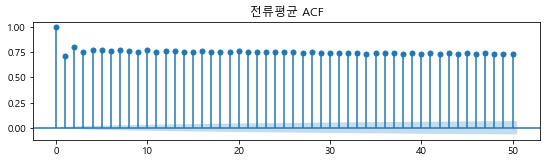

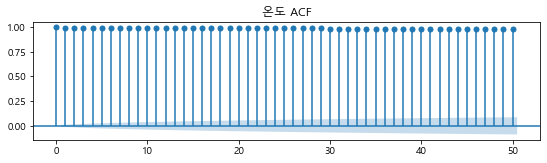

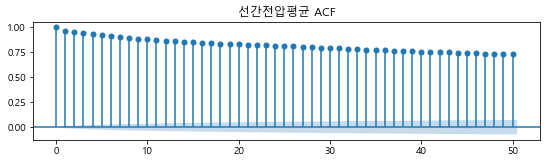

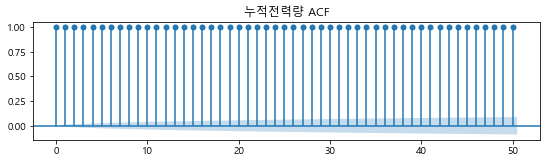

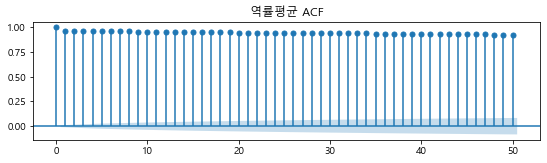

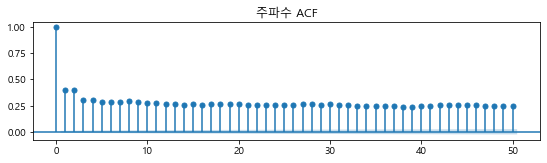

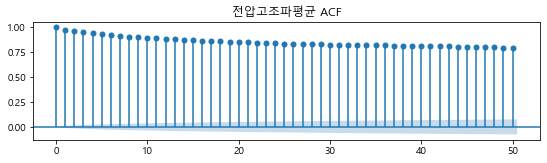

In [45]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

for i in X_train.columns[1:]:
    j=1
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(4,2,j)
    fig=sm.graphics.tsa.plot_acf(comp_1_one[i],lags=50, ax=ax, use_vlines=True, title='{} ACF'.format(i)) #자기상관계수
    j+=1
    
## ACF값이 아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

#### 추세제거 및 정상성 확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    주파수   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2000.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:40:08   Log-Likelihood:                 95692.
No. Observations:               43135   AIC:                        -1.914e+05
Df Residuals:                   43128   BIC:                        -1.913e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6511      0.014   4117.833      0.000      59.623      59.680
전압고조파평균       -0.0016      0.000    -11.277      0.000      -0.002      -0.001
전류평균        4.493e-05   1.05e-05      4.261      0.000    2.43e-05    6.56e-05
온도             0.0035   3.79e-05     91.357      0.000       0.003       0.004
선간전압평균         0.0003   3.68e-05      9.159      0.000       0.000       0.000
누적전력량       6.259e-11   2.82e-11      2.216      0.027    7.23e-12    1.18e-10
역률평균           0.0009      0.001      1.061      0.289      -0.001       0.002
==============================================================================
Omnibus:                      113.861   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.145
Skew:                           0.113   Prob(JB):                     4.45e-25
Kurtosis:                       2.893   Cond. No.                     9.59e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

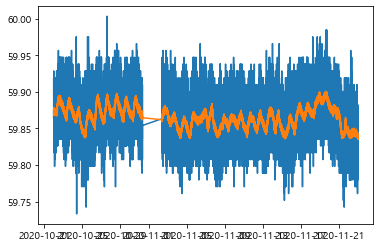

In [141]:
#c(month):더미화, -1:절편제거
result = sm.OLS.from_formula(formula='주파수 ~ 전압고조파평균+전류평균+온도+선간전압평균+누적전력량+역률평균', data=X_train).fit() 
display(result.summary())

plt.plot(X_train.NEWTIME, X_train.주파수, X_train.NEWTIME, result.fittedvalues)
plt.show()

In [142]:
## ADF 검증
adf_test(result.fittedvalues)

ADF Statistic : -2.901716 
p-value : 0.045149
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [143]:
## KPSS 검증
kpss_test(result.fittedvalues)

KPSS Statistic : 6.614532939927855
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


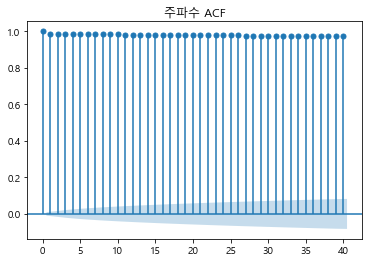

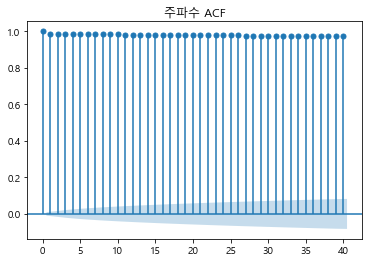

In [144]:
sm.graphics.tsa.plot_acf(result.fittedvalues,lags=40, use_vlines=True, title='주파수 ACF') #자기상관계수

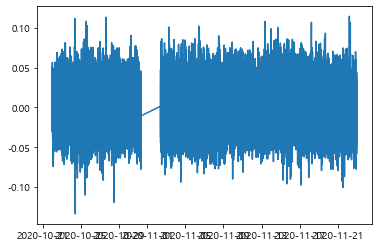

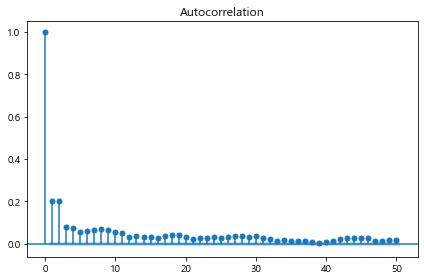

In [145]:
# 추세 제거 및 정상성 확인 (전압고조파평균)
## 방법1
plt.plot(X_train.NEWTIME, result.resid)
plt.show()

sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

In [146]:
## ADF 검증
adf_test(result.resid)

ADF Statistic : -24.297260 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [147]:
## KPSS 검증
kpss_test(result.resid)

KPSS Statistic : 0.4131216606335761
p-vluae : 0.07149928420966549
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


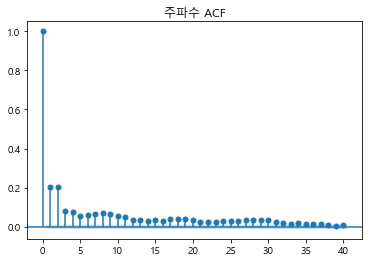

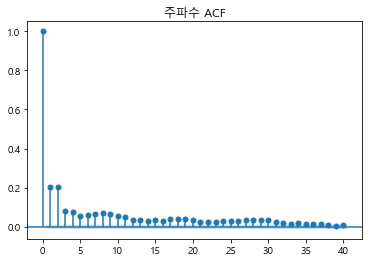

In [148]:
sm.graphics.tsa.plot_acf(result.resid,lags=40, use_vlines=True, title='주파수 ACF') #자기상관계수

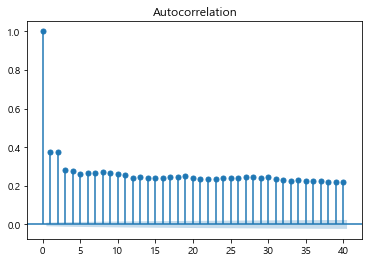

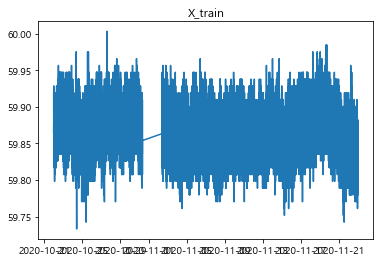

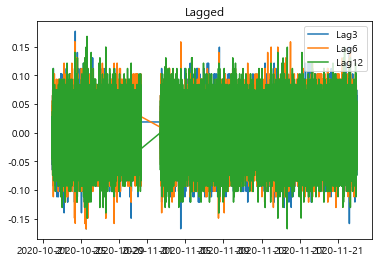

In [150]:
# 계절성 제거 및 정상성 확인
## 방법2
sm.graphics.tsa.plot_acf(X_train.주파수, lags=40, use_vlines=True)
plt.show()

plt.plot(X_train.NEWTIME, X_train.주파수)
plt.title('X_train')
plt.show()
seasonal_lag = 3
plt.plot(X_train.NEWTIME[seasonal_lag:], X_train.주파수.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(X_train.NEWTIME[seasonal_lag:], X_train.주파수.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(X_train.NEWTIME[seasonal_lag:], X_train.주파수.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

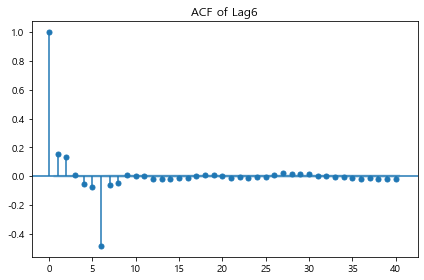

In [151]:
seasonal_lag = 6

sm.graphics.tsa.plot_acf(X_train.주파수.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [152]:
## ADF 검증
adf_test(X_train.주파수.diff(seasonal_lag).dropna())

ADF Statistic : -42.886992 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [153]:
## KPSS 검증
kpss_test(X_train.주파수.diff(seasonal_lag).dropna())

KPSS Statistic : 0.0018027560373656657
p-vluae : 0.1
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


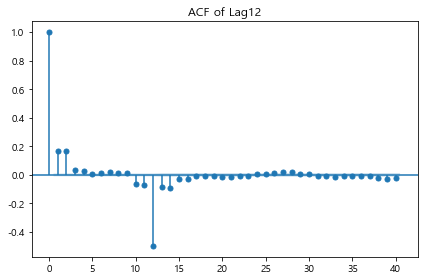

In [154]:
seasonal_lag = 12
sm.graphics.tsa.plot_acf(X_train.주파수.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [155]:
## ADF 검증
adf_test(X_train.주파수.diff(seasonal_lag).dropna())

ADF Statistic : -45.020247 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [156]:
## KPSS 검증
kpss_test(X_train.주파수.diff(seasonal_lag).dropna())

KPSS Statistic : 0.0024986649028804087
p-vluae : 0.1
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


#### 계절성 제거 train셋

In [314]:
change_value_dict = {0 :0.01}
X_train_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_train_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_train_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_train_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

X_test_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_test_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_test_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_test_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

In [315]:
seasonal_lag = 6

for i in X_train_scaling.columns[1:]:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag).dropna()
    
for i in X_test_scaling.columns[1:]:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag).dropna()

In [316]:
X_train=X_train_scaling[6:]
X_test=X_test_scaling[6:]

In [317]:
X_train1 = X_train[['전류평균', '선간전압평균', '누적전력량', '주파수','온도','전압고조파평균']]
X_test1 = X_test[['전류평균', '선간전압평균', '누적전력량', '주파수', '온도','전압고조파평균']]
Y_train1 = X_train['역률평균']
Y_test1 = X_test['역률평균']

In [318]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train1, X_train1).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              233.6
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                   7.97e-295
Time:                        22:48:27   Log-Likelihood:                     -1.1848e+05
No. Observations:               43129   AIC:                                  2.370e+05
Df Residuals:                   43123   BIC:                                  2.370e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전류평균           0.4560      0.018     24.772      0.000       0.420       0.492
선간전압평균        -1.0789      0.059    -18.154      0.000      -1.195      -0.962
누적전력량         33.6649      1.633     20.614      0.000      30.464      36.866
주파수            0.0492      0.019      2.602      0.009       0.012       0.086
온도            -0.0891      0.162     -0.550      0.582      -0.406       0.228
전압고조파평균       -0.3550      0.056     -6.301      0.000      -0.465      -0.245
==============================================================================
Omnibus:                    16010.234   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8417600.571
Skew:                           0.282   Prob(JB):                         0.00
Kurtosis:                      71.438   Cond. No.                         88.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

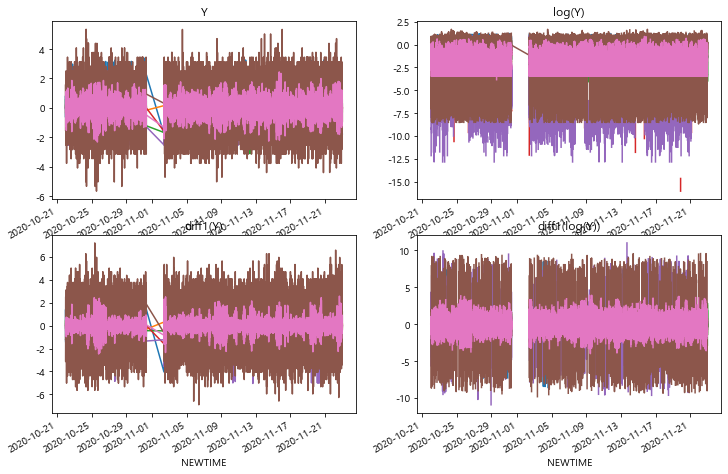

In [241]:
## 로그변환

## 정상성 확보
plt.figure(figsize=(12,8))
X_train_scaling.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(X_train_scaling).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
X_train_scaling.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(X_train_scaling).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

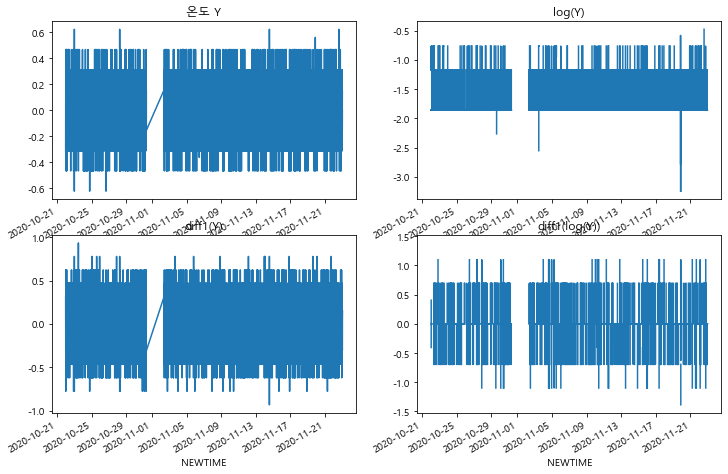

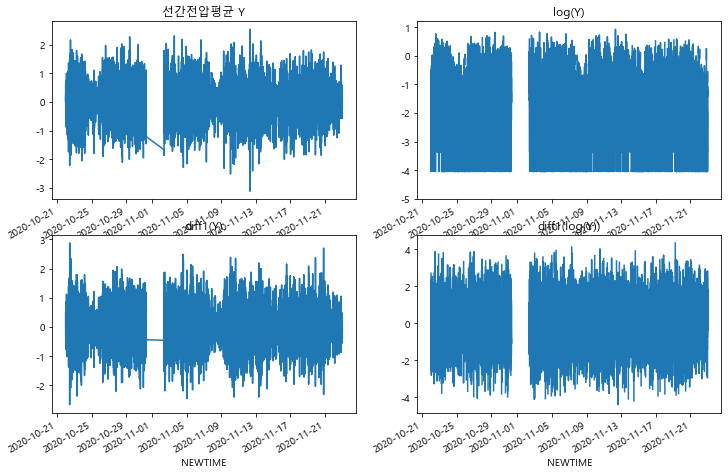

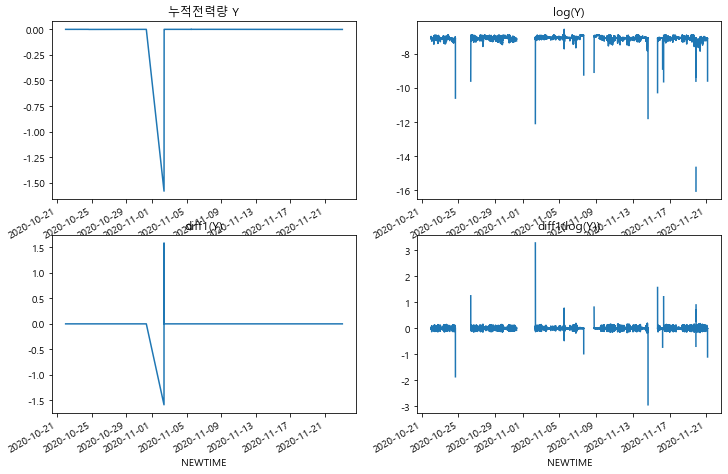

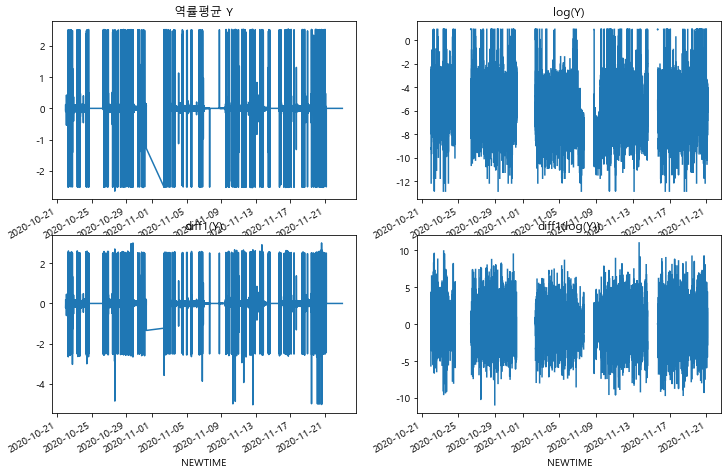

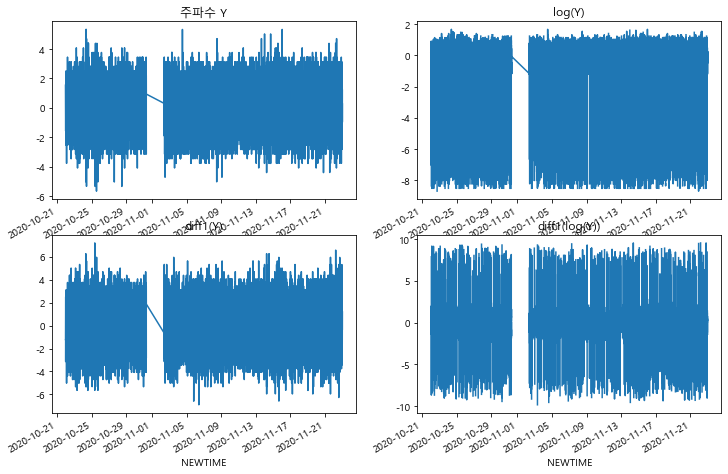

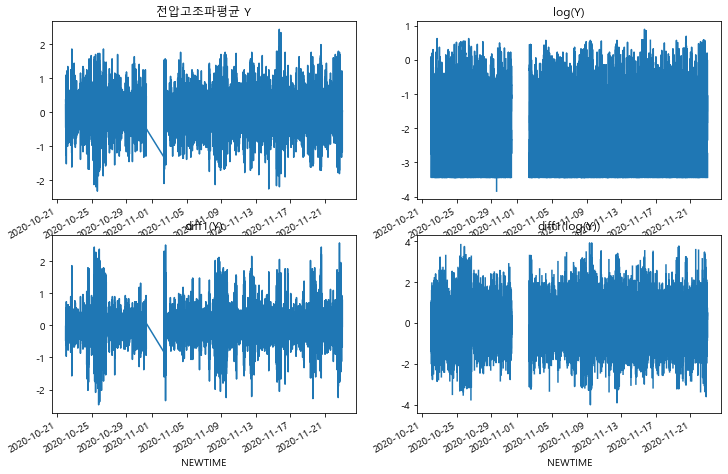

In [281]:
for raw in X_train.columns[1:]:
    plt.figure(figsize=(12,8))
    X_train[raw].plot(ax=plt.subplot(221), title='{} Y'.format(raw), legend=False)
    np.log(X_train[raw]).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
    X_train[raw].diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
    np.log(X_train[raw]).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
    plt.show()

# OLS Regression

#로그변했을 때  
#raw_log = np.log1p(X_train_scaling)
#test_log = np.log1p(X_test_scaling)

#데이터 분할(로그)  
Y_colname = ['전압고조파평균'] #예측할 att  
X_colname = ['온도', '전류평균', '역률평균']  

X_train = raw_log[['전류평균', '온도', '전압고조파평균']]  
X_test = test_log[['전류평균', '온도', '전압고조파평균']]  
Y_train = raw_log['역률평균']  
Y_test = test_log['역률평균']  

In [100]:
### 차분 안했을 때 (표준화만)
X_train = X_train_scaling[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
X_test = X_test_scaling[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
Y_train = X_train_scaling['역률평균']
Y_test = X_test_scaling['역률평균']

차분 적용했을 때  
X_train_diff=X_train_scaling.diff(1)[1:]
X_test_diff=X_test_scaling.diff(1)[1:]

X_train = X_train_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
X_test = X_test_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
Y_train = X_train_diff['역률평균']
Y_test = X_test_diff['역률평균']

In [101]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          3.984e+04
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:27:39   Log-Likelihood:                         -23980.
No. Observations:               43135   AIC:                                  4.797e+04
Df Residuals:                   43130   BIC:                                  4.801e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전류평균           0.8129      0.003    312.723      0.000       0.808       0.818
선간전압평균        -0.1116      0.003    -42.131      0.000      -0.117      -0.106
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
주파수            0.0429      0.002     20.494      0.000       0.039       0.047
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
전압고조파평균        0.0934      0.002     42.371      0.000       0.089       0.098
==============================================================================
Omnibus:                     4161.380   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16103.048
Skew:                           0.436   Prob(JB):                         0.00
Kurtosis:                       5.863   Cond. No.                     3.19e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [256]:
# 예측값
pred_tr_reg1 = fit_reg1.predict(X_train1).values
pred_te_reg1 = fit_reg1.predict(X_test1).values

In [257]:
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual

In [258]:
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

            MAE       MSE  MAPE
Train  0.275229  0.155412   inf
Test   0.271585  0.149888   inf
                        Error
NEWTIME                      
2020-10-22 00:06:22  0.234251
2020-10-22 00:07:22  0.207113
2020-10-22 00:08:22  0.403938
2020-10-22 00:09:22  0.378300
2020-10-22 00:10:22  0.285167
...                       ...
2020-11-22 23:55:35 -0.226140
2020-11-22 23:56:35 -0.070274
2020-11-22 23:57:35 -0.046738
2020-11-22 23:58:35  0.049991
2020-11-22 23:59:35 -0.001470

[43129 rows x 1 columns]
                        Error
NEWTIME                      
2020-11-23 00:06:35  0.041645
2020-11-23 00:07:35 -0.125490
2020-11-23 00:08:35  0.134897
2020-11-23 00:09:35  0.290801
2020-11-23 00:10:35  0.769308
...                       ...
2020-11-26 23:55:35 -0.395162
2020-11-26 23:56:35 -0.186755
2020-11-26 23:57:35 -0.152651
2020-11-26 23:58:35 -0.041760
2020-11-26 23:59:35  0.131944

[5754 rows x 1 columns]


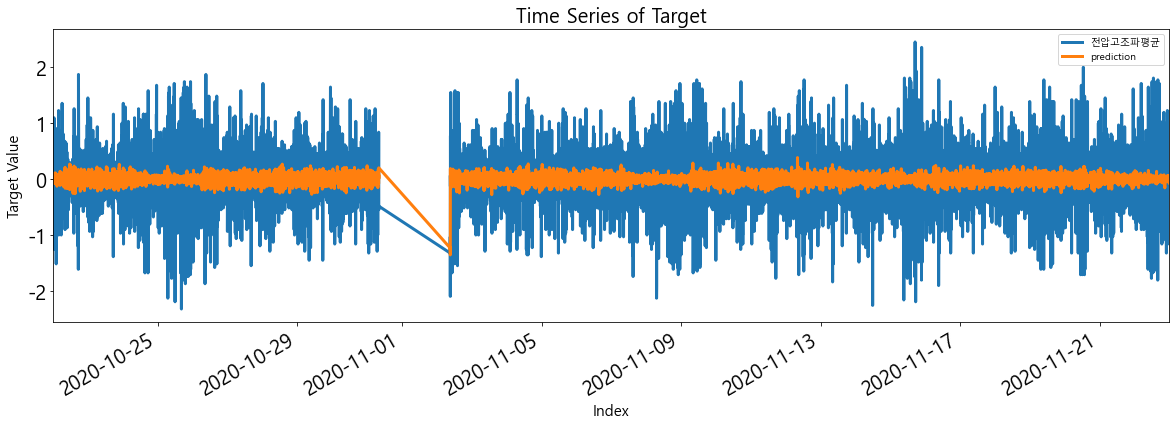

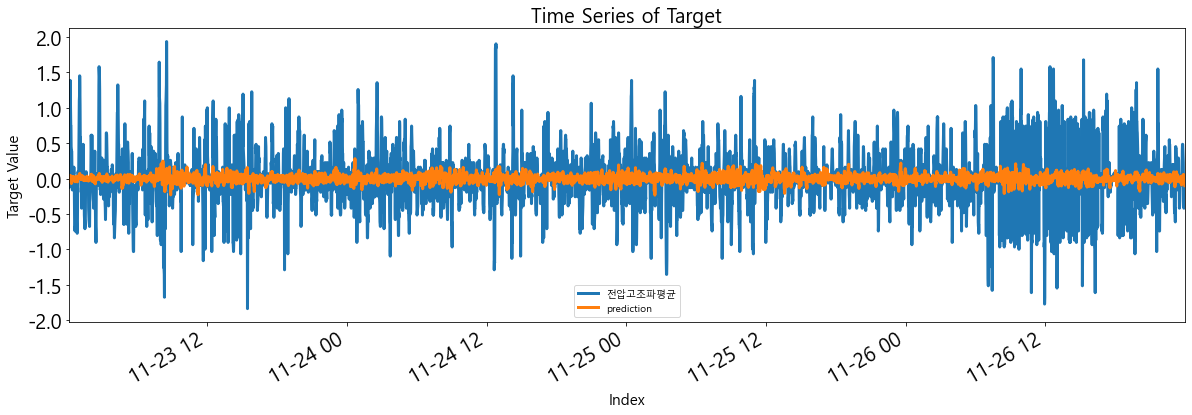

In [259]:
# 예측값 평가
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train1, pred_tr_reg1, Y_test1, pred_te_reg1, graph_on=True)
print(Score_reg1)
print(Resid_tr_reg1)
print(Resid_te_reg1)

# 잔차분석